<a href="https://colab.research.google.com/github/KalikiriHema/MovieRecomendations/blob/main/project1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
movies=pd.read_csv('https://github.com/YBIFoundation/Dataset/raw/main/Movies%20Recommendation.csv')


In [ ]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4760 entries, 0 to 4759
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Movie_ID                  4760 non-null   int64  
 1   Movie_Title               4760 non-null   object 
 2   Movie_Genre               4760 non-null   object 
 3   Movie_Language            4760 non-null   object 
 4   Movie_Budget              4760 non-null   int64  
 5   Movie_Popularity          4760 non-null   float64
 6   Movie_Release_Date        4760 non-null   object 
 7   Movie_Revenue             4760 non-null   int64  
 8   Movie_Runtime             4758 non-null   float64
 9   Movie_Vote                4760 non-null   float64
 10  Movie_Vote_Count          4760 non-null   int64  
 11  Movie_Homepage            1699 non-null   object 
 12  Movie_Keywords            4373 non-null   object 
 13  Movie_Overview            4757 non-null   object 
 14  Movie_Pr

# New section

In [ ]:
movies.shape

(4760, 21)

In [ ]:
movies.columns

Index(['Movie_ID', 'Movie_Title', 'Movie_Genre', 'Movie_Language',
       'Movie_Budget', 'Movie_Popularity', 'Movie_Release_Date',
       'Movie_Revenue', 'Movie_Runtime', 'Movie_Vote', 'Movie_Vote_Count',
       'Movie_Homepage', 'Movie_Keywords', 'Movie_Overview',
       'Movie_Production_House', 'Movie_Production_Country',
       'Movie_Spoken_Language', 'Movie_Tagline', 'Movie_Cast', 'Movie_Crew',
       'Movie_Director'],
      dtype='object')

In [ ]:
movies.describe()


,Movie_ID,Movie_Budget,Movie_Popularity,Movie_Revenue,Movie_Runtime,Movie_Vote,Movie_Vote_Count
count,4760.000000,4.760000e+03,4760.000000,4.760000e+03,4758.000000,4760.000000,4760.000000
mean,2382.566387,2.920129e+07,21.599510,8.263743e+07,107.184111,6.113866,692.508403
std,1377.270159,4.075620e+07,31.887919,1.630554e+08,21.960332,1.141294,1235.007337
min,1.000000,0.000000e+00,0.000372,0.000000e+00,0.000000,0.000000,0.000000
25%,1190.750000,9.257500e+05,4.807074,0.000000e+00,94.000000,5.600000,55.000000
50%,2380.500000,1.500000e+07,13.119058,1.944716e+07,104.000000,6.200000,238.000000
75%,3572.250000,4.000000e+07,28.411929,9.341276e+07,118.000000,6.800000,740.250000
max,4788.000000,3.800000e+08,875.581305,2.787965e+09,338.000000,10.000000,13752.000000


In [ ]:
movies.head()

,Movie_ID,Movie_Title,Movie_Genre,Movie_Language,Movie_Budget,Movie_Popularity,Movie_Release_Date,Movie_Revenue,Movie_Runtime,Movie_Vote,...,Movie_Homepage,Movie_Keywords,Movie_Overview,Movie_Production_House,Movie_Production_Country,Movie_Spoken_Language,Movie_Tagline,Movie_Cast,Movie_Crew,Movie_Director
0,1,Four Rooms,Crime Comedy,en,4000000,22.876230,09-12-1995,4300000,98.0,6.5,...,NaN,hotel new year's eve witch bet hotel room,It's Ted the Bellhop's first night on the job....,"[{""name"": ""Miramax Films"", ""id"": 14}, {""name"":...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...","[{""iso_639_1"": ""en"", ""name"": ""English""}]",Twelve outrageous guests. Four scandalous requ...,Tim Roth Antonio Banderas Jennifer Beals Madon...,"[{'name': 'Allison Anders', 'gender': 1, 'depa...",Allison Anders
1,2,Star Wars,Adventure Action Science Fiction,en,11000000,126.393695,25-05-1977,775398007,121.0,8.1,...,http://www.starwars.com/films/star-wars-episod...,android galaxy hermit death star lightsaber,Princess Leia is captured and held hostage by ...,"[{""name"": ""Lucasfilm"", ""id"": 1}, {""name"": ""Twe...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...","[{""iso_639_1"": ""en"", ""name"": ""English""}]","A long time ago in a galaxy far, far away...",Mark Hamill Harrison Ford Carrie Fisher Peter ...,"[{'name': 'George Lucas', 'gender': 2, 'depart...",George Lucas
2,3,Finding Nemo,Animation Family,en,94000000,85.688789,30-05-2003,940335536,100.0,7.6,...,http://movies.disney.com/finding-nemo,father son relationship harbor underwater fish...,"Nemo, an adventurous young clownfish, is unexp...","[{""name"": ""Pixar Animation Studios"", ""id"": 3}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...","[{""iso_639_1"": ""en"", ""name"": ""English""}]","There are 3.7 trillion fish in the ocean, they...",Albert Brooks Ellen DeGeneres Alexander Gould ...,"[{'name': 'Andrew Stanton', 'gender': 2, 'depa...",Andrew Stanton
3,4,Forrest Gump,Comedy Drama Romance,en,55000000,138.133331,06-07-1994,677945399,142.0,8.2,...,NaN,vietnam veteran hippie mentally disabled runni...,A man with a low IQ has accomplished great thi...,"[{""name"": ""Paramount Pictures"", ""id"": 4}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...","[{""iso_639_1"": ""en"", ""name"": ""English""}]","The world will never be the same, once you've ...",Tom Hanks Robin Wright Gary Sinise Mykelti Wil...,"[{'name': 'Alan Silvestri', 'gender': 2, 'depa...",Robert Zemeckis
4,5,American Beauty,Drama,en,15000000,80.878605,15-09-1999,356296601,122.0,7.9,...,http://www.dreamworks.com/ab/,male nudity female nudity adultery midlife cri...,"Lester Burnham, a depressed suburban father in...","[{""name"": ""DreamWorks SKG"", ""id"": 27}, {""name""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...","[{""iso_639_1"": ""en"", ""name"": ""English""}]",Look closer.,Kevin Spacey Annette Bening Thora Birch Wes Be...,"[{'name': 'Thomas Newman', 'gender': 2, 'depar...",Sam Mendes


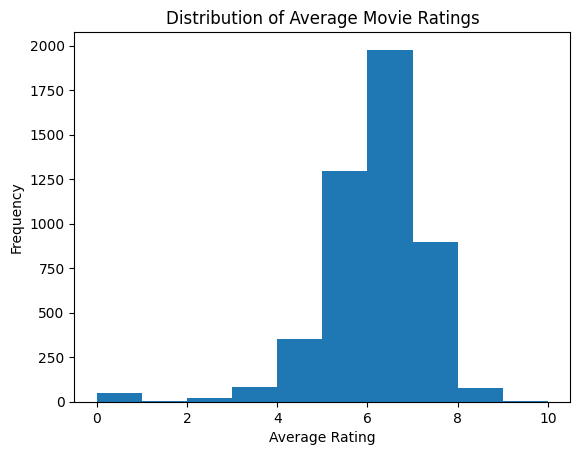

In [ ]:

plt.hist(movies['Movie_Vote'])
plt.xlabel('Average Rating')
plt.ylabel('Frequency')
plt.title('Distribution of Average Movie Ratings')
plt.show()

In [ ]:
movies.isnull().sum()

Movie_ID                       0
Movie_Title                    0
Movie_Genre                    0
Movie_Language                 0
Movie_Budget                   0
Movie_Popularity               0
Movie_Release_Date             0
Movie_Revenue                  0
Movie_Runtime                  2
Movie_Vote                     0
Movie_Vote_Count               0
Movie_Homepage              3061
Movie_Keywords               387
Movie_Overview                 3
Movie_Production_House         0
Movie_Production_Country       0
Movie_Spoken_Language          0
Movie_Tagline                818
Movie_Cast                    27
Movie_Crew                     0
Movie_Director                22
dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split

# Correctly structure the features 'x' as a DataFrame subset
x = movies[['Movie_Genre','Movie_Director','Movie_Cast','Movie_Release_Date']]
y = movies['Movie_Vote']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [ ]:
M_features=movies[['Movie_Genre','Movie_Tagline','Movie_Director','Movie_Cast','Movie_Release_Date']].fillna('')

In [ ]:
M_features.shape

(4760, 5)

In [ ]:
M_features

,Movie_Genre,Movie_Tagline,Movie_Director,Movie_Cast,Movie_Release_Date
0,Crime Comedy,Twelve outrageous guests. Four scandalous requ...,Allison Anders,Tim Roth Antonio Banderas Jennifer Beals Madon...,09-12-1995
1,Adventure Action Science Fiction,"A long time ago in a galaxy far, far away...",George Lucas,Mark Hamill Harrison Ford Carrie Fisher Peter ...,25-05-1977
2,Animation Family,"There are 3.7 trillion fish in the ocean, they...",Andrew Stanton,Albert Brooks Ellen DeGeneres Alexander Gould ...,30-05-2003
3,Comedy Drama Romance,"The world will never be the same, once you've ...",Robert Zemeckis,Tom Hanks Robin Wright Gary Sinise Mykelti Wil...,06-07-1994
4,Drama,Look closer.,Sam Mendes,Kevin Spacey Annette Bening Thora Birch Wes Be...,15-09-1999
...,...,...,...,...,...
4755,Horror,The hot spot where Satan's waitin'.,Pece Dingo,Lisa Hart Carroll Michael Des Barres Paul Drak...,01-01-1990
4756,Comedy Family Drama,It’s better to stand out than to fit in.,Frank Lotito,Roni Akurati Brighton Sharbino Jason Lee Anjul...,03-02-2017
4757,Thriller Drama,She never knew it could happen to her...,Jaco Booyens,Nicole Smolen Kim Baldwin Ariana Stephens Brys...,15-06-2014
4758,Family,,,,27-10-2015


In [ ]:
x=M_features['Movie_Genre']+M_features['Movie_Tagline']+M_features['Movie_Director']+M_features['Movie_Cast']+M_features['Movie_Release_Date']

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf=TfidfVectorizer()
x=tfidf.fit_transform(x)


In [ ]:
x.shape

(4760, 23931)

In [ ]:
print(x)

  (0, 99)	0.12708226706214792
  (0, 18)	0.08162532311215666
  (0, 21450)	0.2142249853784328
  (0, 13869)	0.15682104791265133
  (0, 13618)	0.1973032382918173
  (0, 1786)	0.1973032382918173
  (0, 11332)	0.11346958131000699
  (0, 1558)	0.15568535846441162
  (0, 1025)	0.15926437744028052
  (0, 18413)	0.16345974411858633
  (0, 891)	0.2142249853784328
  (0, 716)	0.16058431622048674
  (0, 13026)	0.11157615829265428
  (0, 15890)	0.07782392748030562
  (0, 7101)	0.17750606330710222
  (0, 23639)	0.1481135708244689
  (0, 15572)	0.12640408676915935
  (0, 23199)	0.1918556524900574
  (0, 8148)	0.09606053419999469
  (0, 23154)	0.12240310557434828
  (0, 11414)	0.16345974411858633
  (0, 20908)	0.12103329106964643
  (0, 15979)	0.10533983391396728
  (0, 5327)	0.1328761412317779
  (0, 7997)	0.13715338474682534
  :	:
  (4757, 2466)	0.293764131809569
  (4757, 11171)	0.293764131809569
  (4757, 20211)	0.2705595446657336
  (4757, 1522)	0.19891624411258657
  (4757, 4651)	0.20310634852234025
  (4757, 9651)	0.2221

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity
cs=cosine_similarity(x)

In [ ]:
cs

array([[1.        , 0.01997163, 0.05418649, ..., 0.        , 0.        ,
        0.01515069],
       [0.01997163, 1.        , 0.02538645, ..., 0.        , 0.        ,
        0.        ],
       [0.05418649, 0.02538645, 1.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 1.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 1.        ,
        0.09207482],
       [0.01515069, 0.        , 0.        , ..., 0.        , 0.09207482,
        1.        ]])

In [ ]:
cs.shape

(4760, 4760)

In [ ]:
moviename=input('enter your favourite movie name')

enter your favourite movie nameavtaar


In [ ]:
allmovieslist=movies['Movie_Title'].tolist()

In [ ]:
import difflib
movierecomendation=difflib.get_close_matches(moviename,allmovieslist)
print(movierecomendation)

['Avatar', 'Gattaca']


In [ ]:
closematch=movierecomendation[0]
print(closematch)

Avatar


In [ ]:
indexofclosematch=movies[movies.Movie_Title==closematch]['Movie_ID'].values[0]
print(indexofclosematch)

2692


In [ ]:
#list of similar movies
recomendationscore=list(enumerate(cs[indexofclosematch]))
print(recomendationscore)

[(0, 0.015391935491490365), (1, 0.0), (2, 0.0), (3, 0.013063795335325758), (4, 0.0), (5, 0.015903109070844454), (6, 0.0), (7, 0.025023619565451852), (8, 0.0054434519226135005), (9, 0.010380831717371928), (10, 0.0), (11, 0.005416431563695035), (12, 0.005041831315999138), (13, 0.016624737798439936), (14, 0.0), (15, 0.029856831115729905), (16, 0.00393678425978123), (17, 0.0), (18, 0.004431965880876628), (19, 0.014755867911072036), (20, 0.0), (21, 0.018355335546176407), (22, 0.010670475009703877), (23, 0.005145321226598154), (24, 0.0), (25, 0.03849076734785284), (26, 0.0), (27, 0.0), (28, 0.0), (29, 0.026407160143083454), (30, 0.0), (31, 0.004301305829106226), (32, 0.004004097319441925), (33, 0.02317825122272362), (34, 0.005222898932387197), (35, 0.009272985952920873), (36, 0.0), (37, 0.0), (38, 0.0), (39, 0.0), (40, 0.0), (41, 0.005181133325298167), (42, 0.0), (43, 0.018331168816356196), (44, 0.047269000959457796), (45, 0.0), (46, 0.01803911203879234), (47, 0.0), (48, 0.017543366015105467

In [ ]:
len(recomendationscore)

4760

In [ ]:
#movies sort based on recomendation score
sorted_similar_movies=sorted(recomendationscore, key=lambda x:x[1],reverse=True)
print(sorted_similar_movies)

[(2692, 1.0), (4375, 0.11673932165915196), (3010, 0.11180461762665037), (1886, 0.10402846731468583), (1341, 0.09218828897024986), (3053, 0.08514085069155675), (62, 0.08334559937218414), (4389, 0.0828628344524708), (1021, 0.08202694300076348), (2538, 0.08190733510686116), (254, 0.0797452073926288), (4268, 0.07864848009463231), (3728, 0.07788674336883417), (2112, 0.07640516801520394), (2318, 0.07492047486832519), (952, 0.06993627745221845), (292, 0.0695349793813491), (424, 0.06876011222203235), (1243, 0.06697071570676646), (1134, 0.06672357451895736), (670, 0.06649063161432799), (4588, 0.06554908516488728), (282, 0.06544379801415254), (137, 0.06543473956418222), (384, 0.06537804552036786), (1950, 0.06423920517861993), (4456, 0.06395293468277881), (3385, 0.06381369102154831), (2751, 0.06363497272200631), (1970, 0.06352250802642817), (1845, 0.0634857583725879), (2653, 0.06312003242320471), (4062, 0.06234599193929821), (4682, 0.062253021362273654), (1977, 0.06193264231513132), (408, 0.06173

In [ ]:
#printing names of similar movies
print('Top 30 movies suggested for You :\n')
i=1
for movie in sorted_similar_movies:
  index=movie[0]
  titlefromindex=movies[movies.index==index]['Movie_Title'].values[0]
  if(i<31):
    print(i,'.',titlefromindex)
    i+=1


Top 30 movies suggested for You :

1 . Niagara
2 . The Boy Next Door
3 . The Robe
4 . Tora! Tora! Tora!
5 . Superman III
6 . Duel in the Sun
7 . Brokeback Mountain
8 . The Lazarus Effect
9 . Running with Scissors
10 . All That Jazz
11 . To Kill a Mockingbird
12 . Blackhat
13 . The Odd Life of Timothy Green
14 . Edge of Darkness
15 . Man on Wire
16 . Dreamcatcher
17 . Twister
18 . Mission: Impossible
19 . The Longest Yard
20 . Mad Max 2: The Road Warrior
21 . The Last Castle
22 . The 5th Wave
23 . Butch Cassidy and the Sundance Kid
24 . Ocean's Thirteen
25 . Enemy at the Gates
26 . From Here to Eternity
27 . The Legend of Tarzan
28 . Source Code
29 . Nighthawks
30 . Body Double
